In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
df = pd.read_csv('Bengaluru_House_Data.csv')
print(df.head())
print(df.shape)



              area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   society total_sqft  bath  balcony   price  
0  Coomee        1056   2.0      1.0   39.07  
1  Theanmp       2600   5.0      3.0  120.00  
2      NaN       1440   2.0      3.0   62.00  
3  Soiewre       1521   3.0      1.0   95.00  
4      NaN       1200   2.0      1.0   51.00  
(13320, 9)


In [2]:
print(df.info)

<bound method DataFrame.info of                   area_type   availability                  location  \
0      Super built-up  Area         19-Dec  Electronic City Phase II   
1                Plot  Area  Ready To Move          Chikka Tirupathi   
2            Built-up  Area  Ready To Move               Uttarahalli   
3      Super built-up  Area  Ready To Move        Lingadheeranahalli   
4      Super built-up  Area  Ready To Move                  Kothanur   
...                     ...            ...                       ...   
13315        Built-up  Area  Ready To Move                Whitefield   
13316  Super built-up  Area  Ready To Move             Richards Town   
13317        Built-up  Area  Ready To Move     Raja Rajeshwari Nagar   
13318  Super built-up  Area         18-Jun           Padmanabhanagar   
13319  Super built-up  Area  Ready To Move              Doddathoguru   

            size  society total_sqft  bath  balcony   price  
0          2 BHK  Coomee        1056   2.

In [3]:
print(df.columns)

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')


In [4]:
print(df.dtypes)

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object


In [5]:
df.describe()


,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [7]:
df['area_type'].value_counts()

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64

In [8]:
df['society'].value_counts()

society
GrrvaGr    80
PrarePa    76
Sryalan    59
Prtates    59
GMown E    56
           ..
Amionce     1
JaghtDe     1
Jauraht     1
Brity U     1
RSntsAp     1
Name: count, Length: 2688, dtype: int64

In [9]:
for column in df.columns:
    print(f"Value counts for column '{column}':")
    print(df[column].value_counts())
    print('---------------------------------------')

Value counts for column 'area_type':
area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64
---------------------------------------
Value counts for column 'availability':
availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: count, Length: 81, dtype: int64
---------------------------------------
Value counts for column 'location':
location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1


# DATA CLEANING



In [10]:
#Area Type
print("\nUnique values in 'area_type':")
print(df['area_type'].value_counts())



Unique values in 'area_type':
area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64


In [11]:
#availability
df['availability'] = df['availability'].apply(
    lambda x: 'Ready To Move' if x == 'Ready To Move' else 'Under Construction'
)

df.dropna(subset=['availability'], inplace=True)

print(df['availability'].value_counts())


availability
Ready To Move         10581
Under Construction     2739
Name: count, dtype: int64


In [12]:
#size 
print(f"\nMissing values in 'size' before cleaning: {df['size'].isnull().sum()}")
df.dropna(subset=['size'], inplace=True)
print(f"Shape after dropping rows with missing 'size': {df.shape}")
df['bhk'] = df['size'].apply(lambda x: int(x.split(' ')[0]))
print("\nValue counts for 'bhk' after extraction:")
print(df['bhk'].value_counts().sort_index())




Missing values in 'size' before cleaning: 16
Shape after dropping rows with missing 'size': (13304, 9)

Value counts for 'bhk' after extraction:
bhk
1      656
2     5528
3     4857
4     1417
5      356
6      221
7      100
8       89
9       54
10      14
11       4
12       1
13       1
14       1
16       1
18       1
19       1
27       1
43       1
Name: count, dtype: int64


In [13]:
#total_sqft 

def convert_sqft_to_num(x):
    try:
        tokens = x.split('-')
        if len(tokens) == 2:
            # If it's a range, take the average
            return (float(tokens[0]) + float(tokens[1])) / 2
        # If it's a single number, convert directly
        return float(x)
    except ValueError:
        return np.nan

df['total_sqft'] = df['total_sqft'].apply(convert_sqft_to_num)
print(f"\nMissing values in 'total_sqft' after conversion: {df['total_sqft'].isnull().sum()}")
df.dropna(subset=['total_sqft'], inplace=True)
print(f"Shape after dropping rows with missing 'total_sqft': {df.shape}")



Missing values in 'total_sqft' after conversion: 46
Shape after dropping rows with missing 'total_sqft': (13258, 10)


In [14]:
# bath and balcony

print(f"\nMissing values in 'bath' before imputation: {df['bath'].isnull().sum()}")
df['bath'].fillna(df['bath'].median(), inplace=True)
print(f"Missing values in 'bath' after imputation: {df['bath'].isnull().sum()}")

print(f"\nMissing values in 'balcony' before imputation: {df['balcony'].isnull().sum()}")
df['balcony'].fillna(df['balcony'].median(), inplace=True)
print(f"Missing values in 'balcony' after imputation: {df['balcony'].isnull().sum()}")


Missing values in 'bath' before imputation: 57
Missing values in 'bath' after imputation: 0

Missing values in 'balcony' before imputation: 589
Missing values in 'balcony' after imputation: 0


In [15]:
#society
print(f"\nMissing values in 'society' before dropping: {df['society'].isnull().sum()}")
df.drop('society', axis='columns', inplace=True)
print("Dropped 'society' column.")


Missing values in 'society' before dropping: 5469
Dropped 'society' column.


In [16]:
# Feature Engineering: Create price_per_sqft
df['price_per_sqft'] = (df['price'] * 100000) / df['total_sqft']
print("\nCreated 'price_per_sqft' column.")
print(df.head())


Created 'price_per_sqft' column.
              area_type        availability                  location  \
0  Super built-up  Area  Under Construction  Electronic City Phase II   
1            Plot  Area       Ready To Move          Chikka Tirupathi   
2        Built-up  Area       Ready To Move               Uttarahalli   
3  Super built-up  Area       Ready To Move        Lingadheeranahalli   
4  Super built-up  Area       Ready To Move                  Kothanur   

        size  total_sqft  bath  balcony   price  bhk  price_per_sqft  
0      2 BHK      1056.0   2.0      1.0   39.07    2     3699.810606  
1  4 Bedroom      2600.0   5.0      3.0  120.00    4     4615.384615  
2      3 BHK      1440.0   2.0      3.0   62.00    3     4305.555556  
3      3 BHK      1521.0   3.0      1.0   95.00    3     6245.890861  
4      2 BHK      1200.0   2.0      1.0   51.00    2     4250.000000  


In [17]:
#Outlier Removal for 'price_per_sqft' ---
# We'll remove properties where price_per_sqft is outside one standard deviation
# from the mean for each location. This helps in removing extreme values that
# might skew the model.
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf['price_per_sqft'])
        st = np.std(subdf['price_per_sqft'])
        # Filter out properties where price_per_sqft is outside (mean - 1*std, mean + 1*std)
        reduced_df = subdf[(subdf['price_per_sqft'] > (m - st)) & (subdf['price_per_sqft'] <= (m + st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out
df_cleaned = remove_pps_outliers(df)
print(f"\nShape after removing 'price_per_sqft' outliers: {df_cleaned.shape}")


Shape after removing 'price_per_sqft' outliers: (10111, 10)


In [18]:
# --- 10. Outlier Removal for BHK vs. total_sqft ---
# Remove properties where total_sqft per BHK is less than 300 sqft.
# This handles cases like a 4BHK in a very small area, which is likely an error.
df_cleaned = df_cleaned[~(df_cleaned['total_sqft'] / df_cleaned['bhk'] < 300)]
print(f"Shape after removing BHK/sqft outliers: {df_cleaned.shape}")


Shape after removing BHK/sqft outliers: (9851, 10)


In [19]:
# --- 11. Outlier Removal for 'bath' vs. 'bhk' ---
# Remove properties where number of bathrooms is significantly higher than BHK.
# A common heuristic is to remove properties where bath > bhk + 2.
df_cleaned = df_cleaned[df_cleaned['bath'] < df_cleaned['bhk'] + 2]
print(f"Shape after removing bath/bhk outliers: {df_cleaned.shape}")

Shape after removing bath/bhk outliers: (9753, 10)


In [20]:
# --- 12. Handle 'location' column (Dimensionality Reduction) ---
# Check unique locations before reduction
print(f"\nNumber of unique locations before reduction: {len(df_cleaned['location'].unique())}")



Number of unique locations before reduction: 783


In [21]:
# Identify locations with less than a certain number of data points (e.g., 10 properties)
# These rare locations can be grouped into an 'Other' category to reduce cardinality
location_stats = df_cleaned['location'].value_counts(ascending=False)
location_less_than_10 = location_stats[location_stats <= 10]
# Group these rare locations into an 'Other' category
df_cleaned['location'] = df_cleaned['location'].apply(lambda x: 'Other' if x in location_less_than_10 else x)
print(f"Number of unique locations after reduction: {len(df_cleaned['location'].unique())}")

Number of unique locations after reduction: 184


In [22]:
# --- 13. Drop original 'size' and 'price_per_sqft' columns ---
# The 'size' column has been replaced by 'bhk' and is no longer needed.
# 'price_per_sqft' was primarily used for outlier detection and might not be
# directly used as a feature if 'price' is the target. We drop it to avoid
# data leakage if 'price' is the target.
df_final = df_cleaned.drop(['size', 'price_per_sqft'], axis='columns')
print("\nDropped original 'size' and 'price_per_sqft' columns.")


Dropped original 'size' and 'price_per_sqft' columns.


In [23]:
print("\nFinal cleaned DataFrame head:")
print(df_final.head())
print("\nFinal DataFrame Info:")
df_final.info()
print("\nMissing values after all cleaning steps:")
print(df_final.isnull().sum())
print("\nFinal shape of the DataFrame:", df_final.shape)



Final cleaned DataFrame head:
              area_type        availability              location  total_sqft  \
0  Super built-up  Area       Ready To Move                 Other      1672.0   
1        Built-up  Area       Ready To Move                 Other      1750.0   
2  Super built-up  Area       Ready To Move                 Other      1750.0   
3  Super built-up  Area  Under Construction   Devarachikkanahalli      1250.0   
4  Super built-up  Area       Ready To Move   Devarachikkanahalli      1250.0   

   bath  balcony  price  bhk  
0   3.0      2.0  150.0    3  
1   3.0      3.0  149.0    3  
2   3.0      2.0  150.0    3  
3   2.0      3.0   44.0    3  
4   2.0      2.0   40.0    2  

Final DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 9753 entries, 0 to 10110
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     9753 non-null   object 
 1   availability  9753 non-null   object 

array([[<Axes: title={'center': 'total_sqft'}>,
        <Axes: title={'center': 'bath'}>],
       [<Axes: title={'center': 'balcony'}>,
        <Axes: title={'center': 'price'}>],
       [<Axes: title={'center': 'bhk'}>,
        <Axes: title={'center': 'price_per_sqft'}>]], dtype=object)

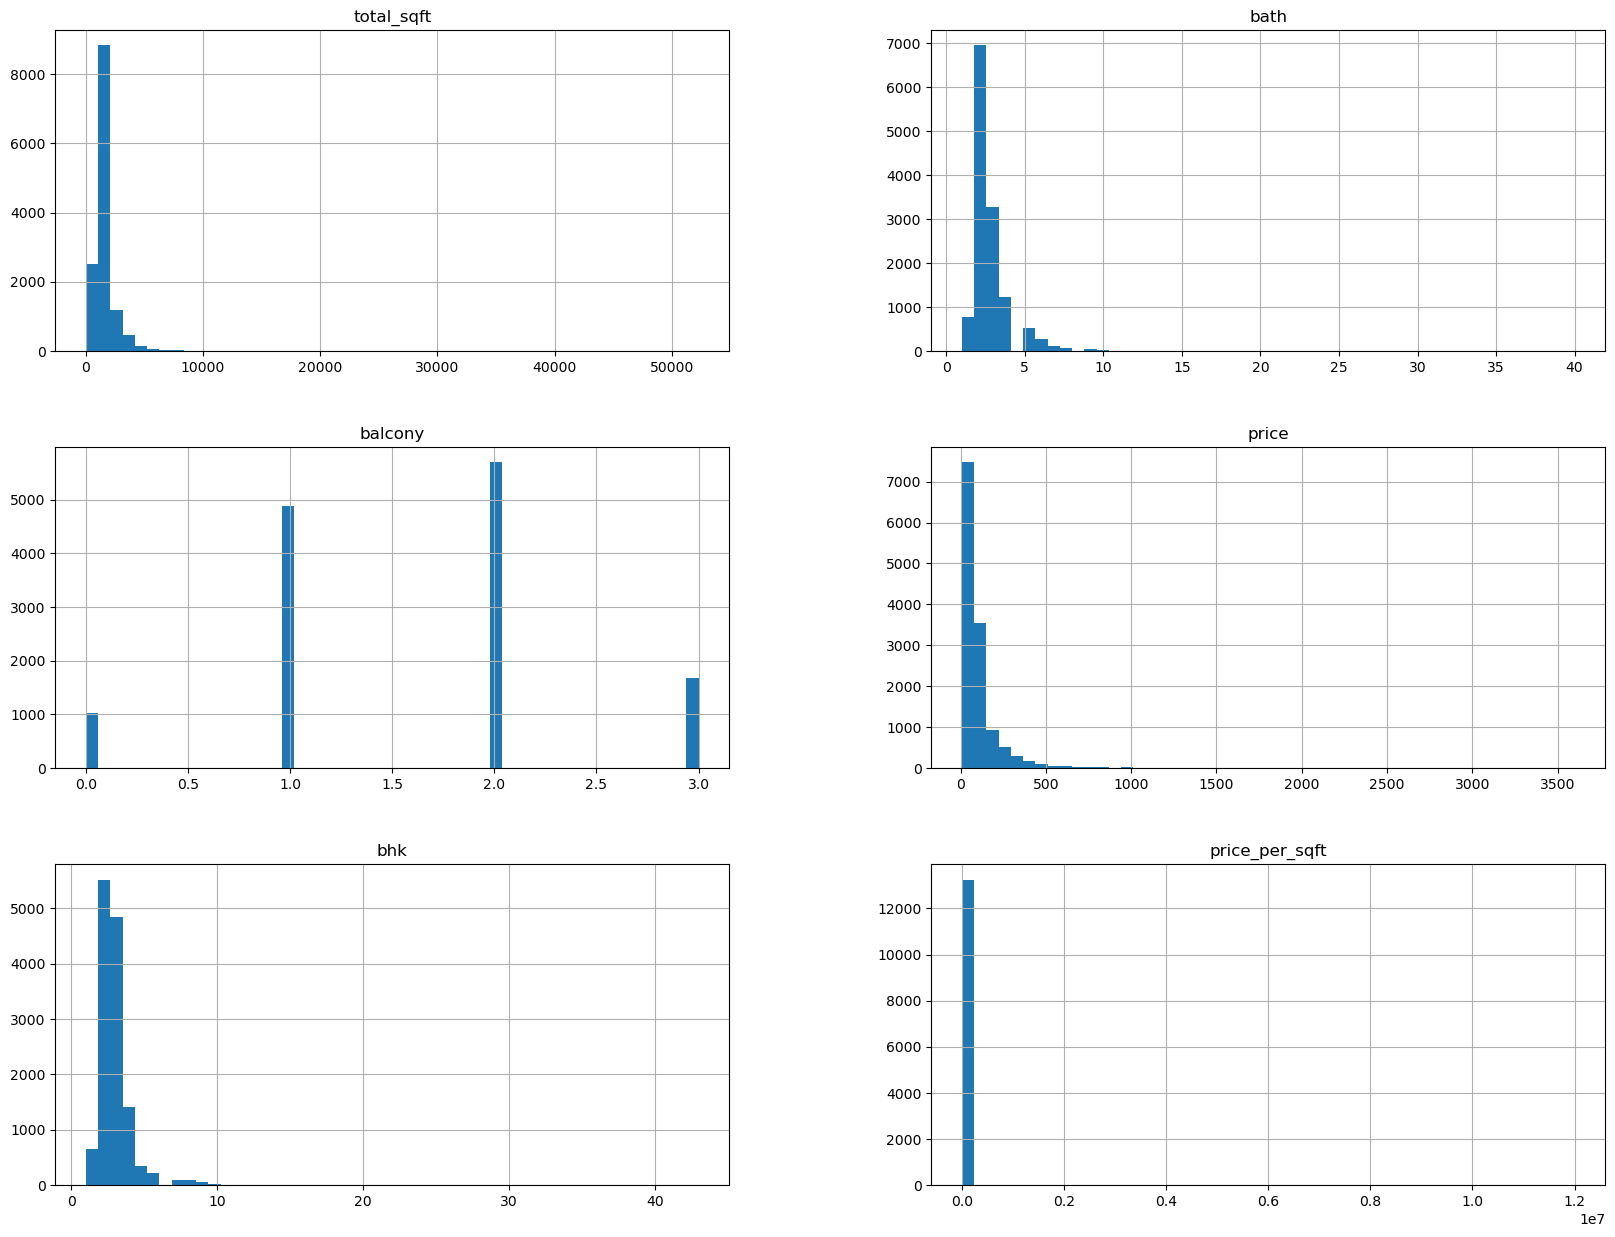

In [24]:
df.hist(bins=50, figsize=(20,15)) 

## TRAIN TEST SPLITTING

In [25]:
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(df, test_size=0.2, random_state=42)
print(f'Rows in test_set: {len(test_set)}, Rows in train_set: {len(train_set)}')

Rows in test_set: 2652, Rows in train_set: 10606


In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor # New import for Decision Tree
from sklearn.ensemble import RandomForestRegressor # New import for Random Forest
from sklearn.metrics import r2_score, mean_squared_error

In [27]:
# --- Data Preparation for ML Models with Scikit-learn ---

# One-hot encode categorical features
# We use drop_first=True to avoid multicollinearity (dummy variable trap)
df_encoded = pd.get_dummies(df_final, columns=['area_type', 'availability', 'location'], drop_first=True)

# Define features (X) and target (y)
# 'price' is our target variable
X = df_encoded.drop('price', axis='columns')
y = df_encoded['price']

print("\nShape of X (features after encoding):", X.shape)
print("Shape of y (target):", y.shape)
print("\nFirst 5 rows of X (features after encoding):")
print(X.head())
print("\nFirst 5 values of y (target):")
print(y.head())

# --- Split data into training and testing sets ---
# We use a test size of 20% and a random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Testing set shape: X_test={X_test.shape}, y_test={y_test.shape}")


# --- 1. Linear Regression Model (Baseline) ---
print("\n--- Training Linear Regression Model ---")
# Initialize the Linear Regression model
lr_model = LinearRegression()

# Train the model using the training data
lr_model.fit(X_train, y_train)
print("Linear Regression training complete.")


# Make predictions on the test set
y_pred_lr = lr_model.predict(X_test)

# Calculate Evaluation Metrics
mse_lr = mean_squared_error(y_test, y_pred_lr)
r_squared_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression - Mean Squared Error (MSE) on Test Set: {mse_lr:.4f}")
print(f"Linear Regression - R-squared Score on Test Set: {r_squared_lr:.4f}")


Shape of X (features after encoding): (9753, 191)
Shape of y (target): (9753,)

First 5 rows of X (features after encoding):
   total_sqft  bath  balcony  bhk  area_type_Carpet  Area  \
0      1672.0   3.0      2.0    3                   False   
1      1750.0   3.0      3.0    3                   False   
2      1750.0   3.0      2.0    3                   False   
3      1250.0   2.0      3.0    3                   False   
4      1250.0   2.0      2.0    2                   False   

   area_type_Plot  Area  area_type_Super built-up  Area  \
0                 False                            True   
1                 False                           False   
2                 False                            True   
3                 False                            True   
4                 False                            True   

   availability_Under Construction  location_1st Phase JP Nagar  \
0                            False                        False   
1                 

# MACHINE LEARNING MODELS


In [28]:
# --- 2. Decision Tree Regressor Model ---
print("\n--- Training Decision Tree Regressor Model ---")

dt_model = DecisionTreeRegressor(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)
print("Decision Tree Regressor training complete.")

# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test)

# Calculate Evaluation Metrics
mse_dt = mean_squared_error(y_test, y_pred_dt)
r_squared_dt = r2_score(y_test, y_pred_dt)

print(f"Decision Tree Regressor - Mean Squared Error (MSE) on Test Set: {mse_dt:.4f}")
print(f"Decision Tree Regressor - R-squared Score on Test Set: {r_squared_dt:.4f}")


--- Training Decision Tree Regressor Model ---
Decision Tree Regressor training complete.
Decision Tree Regressor - Mean Squared Error (MSE) on Test Set: 7221.3870
Decision Tree Regressor - R-squared Score on Test Set: 0.2810


In [29]:
# --- 3. Random Forest Regressor Model ---
print("\n--- Training Random Forest Regressor Model ---")
# Initialize the Random Forest Regressor model
# n_estimators: number of trees in the forest. random_state for reproducibility.
# max_depth can be set, but Random Forest is less prone to overfitting than single DT.
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1) # n_jobs=-1 uses all available cores

# Train the model
rf_model.fit(X_train, y_train)
print("Random Forest Regressor training complete.")

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Calculate Evaluation Metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
r_squared_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Regressor - Mean Squared Error (MSE) on Test Set: {mse_rf:.4f}")
print(f"Random Forest Regressor - R-squared Score on Test Set: {r_squared_rf:.4f}")


--- Training Random Forest Regressor Model ---
Random Forest Regressor training complete.
Random Forest Regressor - Mean Squared Error (MSE) on Test Set: 2778.1339
Random Forest Regressor - R-squared Score on Test Set: 0.7234
